In [133]:
import string
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
import pandas as pd
import numpy as np
import unidecode
import matplotlib.pyplot as plt
from PIL import Image

import os
from os import path

#### en 'd' queda cargado el path de trabajo
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
data = pd.read_csv(d + '/events.csv', sep=',', encoding='utf-8', low_memory=False)


In [74]:
stopw = ''
stopw = stopw.split(',')

In [75]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [76]:
data['model'].value_counts()[0:10]
### Se puede ver que hay modelos repetidos dependiendo
### de la forma en que se ingrasaron

iPhone 6                  50916
iPhone 5s                 44878
iPhone 6S                 39296
iPhone 7                  27556
Samsung Galaxy S7 Edge    23926
Samsung Galaxy S7         19337
iPhone 7 Plus             18792
Samsung Galaxy S8         16959
iPhone SE                 16531
Samsung Galaxy J5         13044
Name: model, dtype: int64

In [115]:
model = data['model']

In [116]:
model.dropna(inplace=True)

In [117]:
model = model.apply(lambda s: re.sub(' ','',s)) ###### remuevo los espacios en blanco de mas
model = model.apply(lambda s: s.upper()) ###### lo paso a mayuscula
####### se retiran los nombres para que los modelos queden mas cortos
model = model.apply(lambda s: re.sub('MOTOROLA','',s)) 
model = model.apply(lambda s: re.sub('GALAXY','',s)) 

In [118]:
model = model.value_counts()[0:100]

In [119]:
iphone = model[model.index.str.contains('IPHONE')].index.values
samsung = model[model.index.str.contains('SAMSUNG')].index.values
motorola = model[model.index.str.contains('MOTO')].index.values
lg = model[model.index.str.contains('LG')].index.values
sony = model[model.index.str.contains('SONY')].index.values

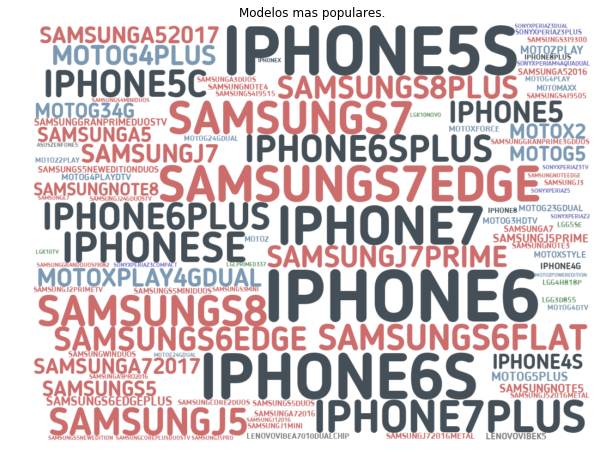

In [134]:
class SimpleGroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

mascara = np.array(Image.open(d + '/trocafone.png'))
wordcloud = WordCloud(
    background_color='white',
    font_path =  '/usr/share/fonts/truetype/BloggerSans/BloggerSans-Bold.ttf',
#    mask=mascara,
    stopwords=stopw,
    contour_width=10,
    contour_color='orange',
#    min_font_size=1,
    max_font_size=135, 
    random_state=267,
    width=1024, 
    height=768,
    prefer_horizontal=1
).generate_from_frequencies(model)

image_colors = ImageColorGenerator(mascara)
color_to_words = {
    '#444F57': iphone,
    '#CC6D6C': samsung,
    '#7B99B2': motorola,
    '#69996B': lg,
    '#7875C0': sony,
}

default_color = 'grey'

grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

fig = plt.figure(1)
plt.title('Modelos mas populares.')
plt.imshow(wordcloud.recolor(color_func=grouped_color_func),interpolation="bilinear",cmap=plt.cm.gray)
fig.set_size_inches(10,15)
plt.axis('off')
plt.savefig("modelosMasRelevantes.png", dpi=600)
plt.show()